Code related to 2 qubit pairs And correlations

In [2]:
import numpy as np
from qutip import Qobj, basis, tensor

# Define the Pauli matrices
sigma_x = Qobj([[0, 1], [1, 0]])
sigma_y = Qobj([[0, -1j], [1j, 0]])
sigma_z = Qobj([[1, 0], [0, -1]])

# Define the qubit states
qubit_00 = tensor(basis(2, 0), basis(2, 0))
qubit_01 = tensor(basis(2, 0), basis(2, 1))
qubit_10 = tensor(basis(2, 1), basis(2, 0))
qubit_11 = tensor(basis(2, 1), basis(2, 1))

# Given coefficients
coeff_00 = 1/np.sqrt(10)
coeff_01 = 2/np.sqrt(10)
coeff_10 = 1/np.sqrt(10)
coeff_11 = 2/np.sqrt(10)

# Calculate the linear combination of the qubit states
state = coeff_00 * qubit_00 + coeff_01 * qubit_01 + coeff_10 * qubit_10 + coeff_11 * qubit_11

# Calculate the correlation using Pauli matrices
correlation_xx = np.real((state.dag() * tensor(sigma_x, sigma_x) * state).tr())
correlation_xy = np.real((state.dag() * tensor(sigma_x, sigma_y) * state).tr())
correlation_xz = np.real((state.dag() * tensor(sigma_x, sigma_z) * state).tr())
correlation_zz = np.real((state.dag() * tensor(sigma_z, sigma_z) * state).tr())
correlation_xy = np.real((state.dag() * tensor(sigma_x, sigma_y) * state).tr())
correlation_yy = np.real((state.dag() * tensor(sigma_y, sigma_y) * state).tr())

print("Correlation xx:", correlation_xx)
print("Correlation xz:", correlation_xz)
print("Correlation zz:", correlation_zz)
print("Correlation yy:", correlation_yy)


Correlation xx: 0.8
Correlation xz: -0.6000000000000001
Correlation zz: 0.0
Correlation yy: 0.0


⟨ψ|X⨉Y|ψ⟩ = correlation X⨉Y tensor / kronecker product

In [4]:

import numpy as np
from qutip import Qobj, basis, tensor

# Define the Pauli matrices
sigma_x = Qobj([[0, 1], [1, 0]])
sigma_y = Qobj([[0, -1j], [1j, 0]])
sigma_z = Qobj([[1, 0], [0, -1]])

# Define the qubit states
qubit_00 = tensor(basis(2, 0), basis(2, 0))
qubit_01 = tensor(basis(2, 0), basis(2, 1))
qubit_10 = tensor(basis(2, 1), basis(2, 0))
qubit_11 = tensor(basis(2, 1), basis(2, 1))

# Given coefficients
coeff_00 = 1/2
coeff_01 = 1/2
coeff_10 = -1/2
coeff_11 = -1/2

# Calculate the linear combination of the qubit states
state = coeff_00 * qubit_00 + coeff_01 * qubit_01 + coeff_10 * qubit_10 + coeff_11 * qubit_11

# Calculate the correlation using Pauli matrices
correlation_xx = np.real((state.dag() * tensor(sigma_x, sigma_x) * state).tr())
correlation_xy = np.real((state.dag() * tensor(sigma_x, sigma_y) * state).tr())
correlation_xz = np.real((state.dag() * tensor(sigma_x, sigma_z) * state).tr())
correlation_zz = np.real((state.dag() * tensor(sigma_z, sigma_z) * state).tr())
correlation_xy = np.real((state.dag() * tensor(sigma_x, sigma_y) * state).tr())
correlation_yy = np.real((state.dag() * tensor(sigma_y, sigma_y) * state).tr())

print("Correlation xx:", correlation_xx)
print("Correlation xz:", correlation_xz)
print("Correlation zz:", correlation_zz)
print("Correlation yy:", correlation_yy)


Correlation xx: -1.0
Correlation xz: 0.0
Correlation zz: 0.0
Correlation yy: 0.0


Partial Trace for 2 Qubit pair ab

In [7]:
import numpy as np
import sympy as sp

# Define the symbolic parameter theta
theta = sp.symbols('theta')

# Define the density matrix for the state |Ψ⟩ab
rho_ab = np.array([[sp.cos(theta)**2, -1j * sp.cos(theta) * sp.sin(theta)],
                   [1j * sp.cos(theta) * sp.sin(theta), sp.sin(theta)**2]])

# Define qubit 'a'
qubit_a = 0

# Calculate the reduced density matrix ρa
rho_a = np.trace(rho_ab)

print("Reduced density matrix rho_a:")
print(rho_a)

Reduced density matrix rho_a:
sin(theta)**2 + cos(theta)**2


In [9]:
import numpy as np
import sympy as sp

# Define the symbolic parameter theta
theta = sp.symbols('theta')

# Define the state |Ψ⟩ab
psi_ab = np.array([sp.cos(theta), 0, 0, -1j * sp.sin(theta)], dtype=object)

# Reshape the state into a 2x2 matrix
psi_ab = psi_ab.reshape((2, 2))

# Create the density matrix for the state |Ψ⟩ab
rho_ab = np.outer(psi_ab, psi_ab.conj())

# Define qubit 'b'
qubit_b = 1

# Calculate the reduced density matrix ρb
rho_b = np.trace(rho_ab)

print("Reduced density matrix rho_b:")
print(rho_b)

Reduced density matrix rho_b:
1.0*sin(theta)*sin(conjugate(theta)) + cos(theta)*cos(conjugate(theta))


Schmidt co-efficent

In [16]:
import numpy as np

# Define the state |X>
state_X = np.array([0.5, 0.5, 0.5, -0.5])

# Calculate the density matrix |X><X|
rho_X = np.outer(state_X, state_X)

# Calculate the Schmidt decomposition (square root of eigenvalues)
schmidt_coeff = np.sqrt(np.linalg.eigvals(rho_X))

# Print the density matrix and Schmidt coefficients
print("Density matrix |X><X|:\n", rho_X)
print("\nSchmidt coefficients:", schmidt_coeff)

Density matrix |X><X|:
 [[ 0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25 -0.25]
 [ 0.25  0.25  0.25 -0.25]
 [-0.25 -0.25 -0.25  0.25]]

Schmidt coefficients: [ 0.  1.  0. nan]


C:\Users\HP\AppData\Local\Temp\ipykernel_13896\2109764056.py:10: RuntimeWarning: invalid value encountered in sqrt
  schmidt_coeff = np.sqrt(np.linalg.eigvals(rho_X))


In [19]:
import numpy as np
from scipy.linalg import svd

# Define the state vector for the two-qubit system
psi = np.array([0.5, 0.5, 0.5, -0.5])  # (00> + 01> + 10> - 11>)

# Reshape the state vector into a matrix
rho = np.outer(psi, psi)

# Perform singular value decomposition (SVD) on the density matrix
U, S, V = svd(rho)

# Calculate the Schmidt coefficients from the singular values
schmidt_coeffs = np.sqrt(S)

# Round the Schmidt coefficients to three decimal places
rounded_coeffs = np.round(schmidt_coeffs, decimals=3)

print("Rounded Schmidt coefficients:", rounded_coeffs)

Rounded Schmidt coefficients: [1. 0. 0. 0.]


In [22]:
import numpy as np
from scipy.linalg import svd

# Define the state vector for the two-qubit system
psi = np.array([0.5, 0.5, -0.5, -0.5])  # (00> + 01> - 10> - 11>)

# Reshape the state vector into a matrix
rho = np.outer(psi, psi)

# Perform singular value decomposition (SVD) on the density matrix
U, S, V = svd(rho)

# Calculate the Schmidt coefficients from the singular values
schmidt_coeffs = np.sqrt(S)

# Round the Schmidt coefficients to three decimal places
rounded_coeffs = np.round(schmidt_coeffs, decimals=3)

print("Rounded Schmidt coefficients:", rounded_coeffs)

Rounded Schmidt coefficients: [1. 0. 0. 0.]


Code to check if qubit of 2 states is entagled or not
or get a*d -b*c = 0 for separable states

In [38]:

# Define the quantum state |x> as a vector
x1 = np.array([9, 12, 12, 16], dtype=complex) / 25
x2 = np.array([12, 16, 9, 12], dtype=complex) / 25
x3 = np.array([16, 12, 9, 12], dtype=complex) / 25
x4 = np.array([16, 12, 12, 9], dtype=complex) / 25

xout1 = 9*12 - 12*12
xout2 = 12*12 - 16*9
xout3 = 16*12 - 12*9
xout4 = 16*9 - 12*12
print(xout1)
print(xout2)
print(xout3)
print(xout4)

-36
0
84
0


In [36]:
import numpy as np
from scipy.linalg import sqrtm
from scipy.linalg import svd
from scipy.stats import entropy

# Define the quantum state |x> as a vector
#x = np.array([9, 12, 12, 16], dtype=complex) / 25
x = np.array([16, 12, 12, 9], dtype=complex) / 25

# Normalize the state vector (optional, but recommended)
x /= np.linalg.norm(x)

# Define the density matrix of |x>
rho = np.outer(x, np.conj(x))

# Partial trace over the second qubit to obtain the reduced density matrix
rho_A = np.trace(rho.reshape(2, 2, 2, 2), axis1=1, axis2=3)

# Compute the square root of the reduced density matrix
sqrt_rho_A = sqrtm(rho_A)

# Perform singular value decomposition (SVD) on the square root
U, S, V = svd(sqrt_rho_A)

# Compute the entanglement entropy
entanglement_entropy = -np.sum(S**2 * np.log(S**2))

# Check if the entanglement entropy is greater than zero
is_entangled = entanglement_entropy > 0

# Output the result
if is_entangled:
    print("The state |x> is entangled.")
else:
    print("The state |x> is not entangled.")

The state |x> is entangled.


qubit |qab> = 1/root(10) (|00>ab + 2|01>ab + 2|10>ab + |11>ab)  python code to get correlation with X⊗X, Y⊗Y, Z⊗Z & X⊗Z

In [39]:
import numpy as np

# Define the quantum state |qab> as a vector
qab = np.array([1, 2, 2, 1], dtype=complex) / np.sqrt(10)

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Define the tensor products of Pauli matrices
X_tensor_X = np.kron(sigma_x, sigma_x)
Y_tensor_Y = np.kron(sigma_y, sigma_y)
Z_tensor_Z = np.kron(sigma_z, sigma_z)
X_tensor_Z = np.kron(sigma_x, sigma_z)

# Calculate the correlations
correlation_X_X = np.real(np.dot(qab, np.dot(X_tensor_X, qab)))
correlation_Y_Y = np.real(np.dot(qab, np.dot(Y_tensor_Y, qab)))
correlation_Z_Z = np.real(np.dot(qab, np.dot(Z_tensor_Z, qab)))
correlation_X_Z = np.real(np.dot(qab, np.dot(X_tensor_Z, qab)))

# Output the correlations
print("Correlation with X⊗X:", correlation_X_X)
print("Correlation with Y⊗Y:", correlation_Y_Y)
print("Correlation with Z⊗Z:", correlation_Z_Z)
print("Correlation with X⊗Z:", correlation_X_Z)

Correlation with X⊗X: 1.0
Correlation with Y⊗Y: 0.6000000000000001
Correlation with Z⊗Z: -0.6000000000000001
Correlation with X⊗Z: 0.0


In [1]:
import numpy as np

# Define the quantum state |qab> as a vector
qab = np.array([1, 2, 1, -1], dtype=complex) / 2

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Define the tensor products of Pauli matrices
X_tensor_X = np.kron(sigma_x, sigma_x)
Y_tensor_Y = np.kron(sigma_y, sigma_y)
Z_tensor_Z = np.kron(sigma_z, sigma_z)
X_tensor_Z = np.kron(sigma_x, sigma_z)

# Calculate the correlations
correlation_X_X = np.real(np.dot(qab, np.dot(X_tensor_X, qab)))
correlation_Y_Y = np.real(np.dot(qab, np.dot(Y_tensor_Y, qab)))
correlation_Z_Z = np.real(np.dot(qab, np.dot(Z_tensor_Z, qab)))
correlation_X_Z = np.real(np.dot(qab, np.dot(X_tensor_Z, qab)))

# Output the correlations
print("Correlation with X⊗X:", correlation_X_X)
print("Correlation with Y⊗Y:", correlation_Y_Y)
print("Correlation with Z⊗Z:", correlation_Z_Z)
print("Correlation with X⊗Z:", correlation_X_Z)

Correlation with X⊗X: 0.5
Correlation with Y⊗Y: 1.5
Correlation with Z⊗Z: -0.75
Correlation with X⊗Z: 1.5


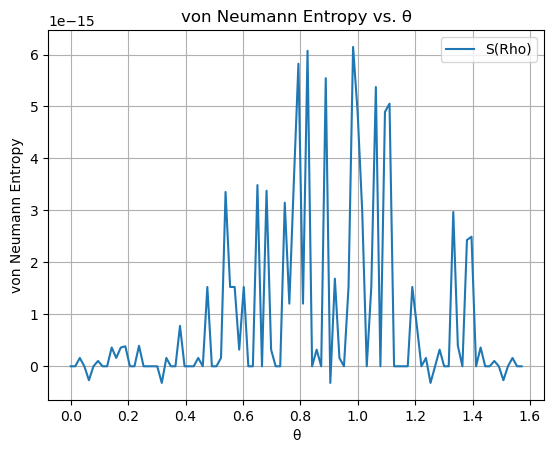

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of θ values
theta_values = np.linspace(0, np.pi/2, 100)

# Initialize an empty list to store von Neumann entropies
von_neumann_entropies = []

# Define the Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Loop through each θ value
for theta in theta_values:
    # Calculate the state |Φ>ab for the current θ
    phi_ab = np.cos(theta) * np.outer(np.array([1, 0], dtype=complex), np.array([1, 0], dtype=complex)) \
             - 1j * np.sin(theta) * np.outer(np.array([0, 1], dtype=complex), np.array([0, 1], dtype=complex))

    # Calculate the density matrix Rho
    rho = np.outer(phi_ab, np.conj(phi_ab))

    # Calculate the von Neumann entropy
    eigvals = np.linalg.eigvalsh(rho)
    entropy = -np.sum([p * np.log2(p) if p > 0 else 0 for p in eigvals])
    von_neumann_entropies.append(entropy)

# Plot the von Neumann entropy as a function of θ
plt.plot(theta_values, von_neumann_entropies, label='S(Rho)')
plt.xlabel('θ')
plt.ylabel('von Neumann Entropy')
plt.title('von Neumann Entropy vs. θ')
plt.grid()
plt.legend()
plt.show()

d:\ProgramData\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


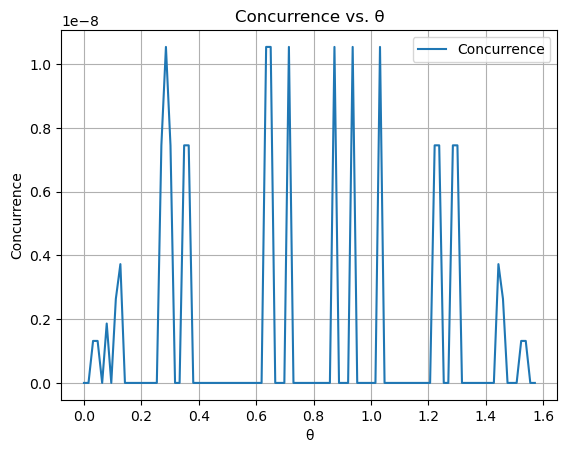

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of θ values
theta_values = np.linspace(0, np.pi/2, 100)

# Initialize an empty list to store concurrence values
concurrence_values = []

# Loop through each θ value
for theta in theta_values:
    # Calculate the state |Φ>ab for the current θ
    phi_ab = np.cos(theta) * np.outer(np.array([1, 0], dtype=complex), np.array([1, 0], dtype=complex)) \
             - 1j * np.sin(theta) * np.outer(np.array([0, 1], dtype=complex), np.array([0, 1], dtype=complex))

    # Calculate the density matrix Rho
    rho = np.outer(phi_ab, np.conj(phi_ab))

    # Calculate the partial transpose of Rho
    rho_T = np.transpose(np.conj(rho))

    # Calculate the "sigma_y" matrix
    sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)

    # Calculate the auxiliary matrix
    rho_sigma_y = np.dot(np.dot(rho, np.kron(sigma_y, sigma_y)), rho_T)

    # Calculate the square root of the auxiliary matrix
    sqrt_rho_sigma_y = np.sqrt(rho_sigma_y)

    # Calculate the eigenvalues of the square root
    eigvals = np.linalg.eigvals(sqrt_rho_sigma_y)

    # Sort the eigenvalues in decreasing order
    sorted_eigvals = np.sort(eigvals)[::-1]

    # Calculate the concurrence
    concurrence = max(0, sorted_eigvals[0] - np.sum(sorted_eigvals[1:]))
    concurrence_values.append(concurrence)

# Plot the concurrence as a function of θ
plt.plot(theta_values, concurrence_values, label='Concurrence')
plt.xlabel('θ')
plt.ylabel('Concurrence')
plt.title('Concurrence vs. θ')
plt.grid()
plt.legend()
plt.show()

Caluclate schimdt coefficent

calculate schmidt coeff
![Alt text](image-2.png)

In [21]:
import numpy as np

# Define the quantum states |q1> and |q2>
q1 = np.array([1, 2, 2, 1], dtype=complex) / np.sqrt(10)
q2 = np.array([1, 2, 1, 2], dtype=complex) / np.sqrt(10)

# Calculate the density matrices
rho1 = np.outer(q1, np.conj(q1))
rho2 = np.outer(q2, np.conj(q2))
print(rho2, "rho2")

# Calculate the reduced density matrices
rho1_A = np.trace(rho1.reshape(2, 2, 2, 2), axis1=1, axis2=3)
rho2_A = np.trace(rho2.reshape(2, 2, 2, 2), axis1=1, axis2=3)
print(rho2_A, "rho2_A")

# Compute the Schmidt coefficients (singular values)
schmidt_coeffs_q1 = np.linalg.svd(rho1_A, compute_uv=False)
schmidt_coeffs_q2 = np.linalg.svd(rho2_A, compute_uv=False)
print(schmidt_coeffs_q2, "schmidt_coeffs_q2")

# Output the Schmidt coefficients
print("Schmidt coefficients for q1>:", schmidt_coeffs_q1)
print("Schmidt coefficients for q2>:", schmidt_coeffs_q2)

[[0.1+0.j 0.2+0.j 0.1+0.j 0.2+0.j]
 [0.2+0.j 0.4+0.j 0.2+0.j 0.4+0.j]
 [0.1+0.j 0.2+0.j 0.1+0.j 0.2+0.j]
 [0.2+0.j 0.4+0.j 0.2+0.j 0.4+0.j]] rho2
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]] rho2_A
[1.00000000e+00 1.67735223e-17] schmidt_coeffs_q2
Schmidt coefficients for q1>: [0.9 0.1]
Schmidt coefficients for q2>: [1.00000000e+00 1.67735223e-17]


#####====================================================

CNOT Operation
Flip bit b if a is 1 
Out = |0><0| ⊗ I + |1><1| ⊗ X

In [16]:
import numpy as np

# Define the quantum state |q> as a vector
q1 = np.array([1, 2, 2, 1], dtype=complex) / np.sqrt(10)
q2 = np.array([1, 2, 1, 2], dtype=complex) / np.sqrt(10)
q3 = np.array([2, 1, 1, 2], dtype=complex) / np.sqrt(10)
q4 = np.array([2, 1, 2, 1], dtype=complex) / np.sqrt(10)

# Define the CNOT gate matrix
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]], dtype=complex)

# Apply the CNOT gate to q1 (control on qubit 1, target on qubit 2)
q1_out = np.dot(CNOT, q1)
q2_out = np.dot(CNOT, q2)
q3_out = np.dot(CNOT, q3)
q4_out = np.dot(CNOT, q4)

# Print the resulting quantum state |q_out>
print("|q_out1> =", q1_out)
print("|q_out2> =", q2_out)
print("|q_out3> =", q3_out)
print("|q_out4> =", q4_out)

|q_out1> = [0.31622777+0.j 0.63245553+0.j 0.31622777+0.j 0.63245553+0.j]
|q_out2> = [0.31622777+0.j 0.63245553+0.j 0.63245553+0.j 0.31622777+0.j]
|q_out3> = [0.63245553+0.j 0.31622777+0.j 0.63245553+0.j 0.31622777+0.j]
|q_out4> = [0.63245553+0.j 0.31622777+0.j 0.31622777+0.j 0.63245553+0.j]


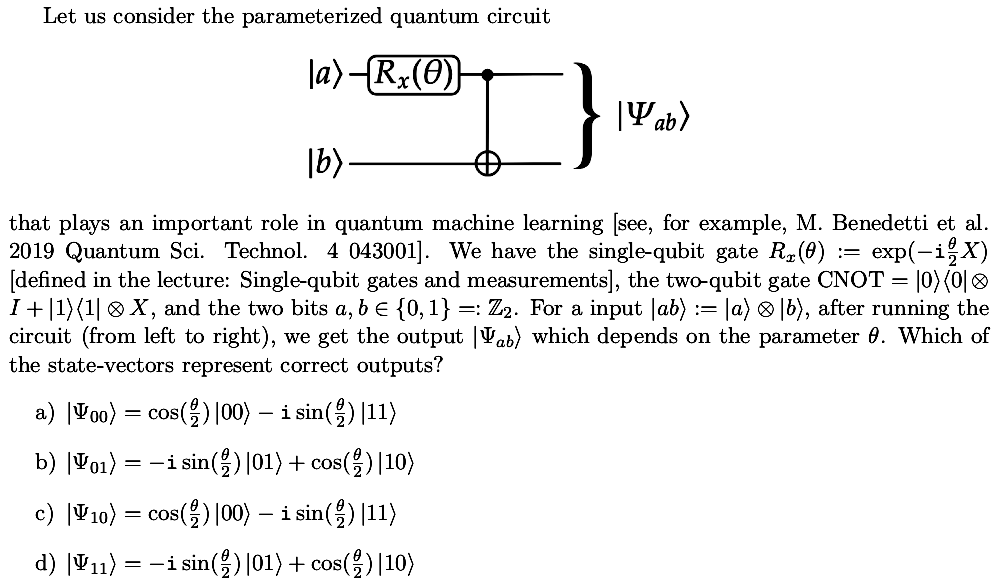

Solution
Rx(θ) = | cosθ/2     -j. sinθ/2|
        | -j. sinθ/2   cosθ/2  |
Rx.|00> then apply CNOT (Flip b if a is |1>)            

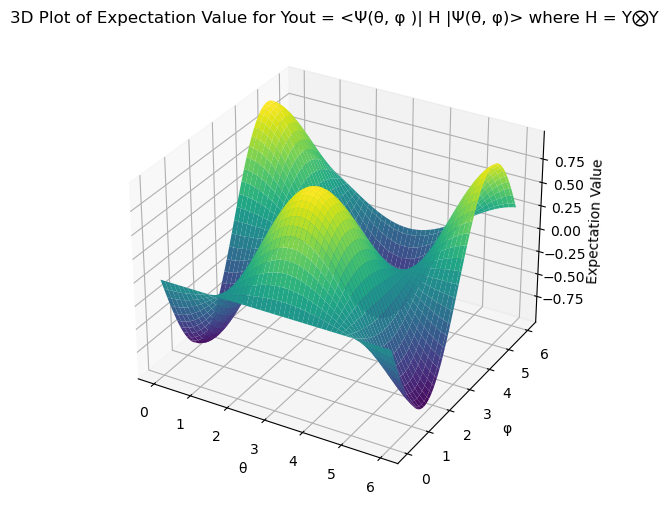

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Pauli-Y matrix
Y = np.array([[0, -1j], [1j, 0]])

# Define the state |00>
ket_00 = np.array([1, 0])

# Define the state |01>
ket_01 = np.array([0, 1])

# Define the state |10>
ket_10 = np.array([1, 0])

# Define the state |11>
ket_11 = np.array([0, 1])

# Initialize lists to store results
theta_values = np.linspace(0, 6, 100)
phi_values = np.linspace(0, 6, 100)
expectation_values = []

# Calculate the expectation value for different θ and φ
for theta in theta_values:
    for phi in phi_values:
        # Define the state |Ψ(θ, φ)>
        psi = (
            np.cos(theta / 2) * np.cos(phi / 2) * np.kron(ket_00, ket_00) +
            np.cos(theta / 2) * np.sin(phi / 2) * np.kron(ket_00, ket_01) +
            np.sin(theta / 2) * np.sin(phi / 2) * np.kron(ket_01, ket_00) +
            np.sin(theta / 2) * np.cos(phi / 2) * np.kron(ket_01, ket_01)
        )
        
        # Calculate the expectation value <Ψ(θ, φ)|H|Ψ(θ, φ)>
        expectation = np.real(np.conj(psi).dot(np.kron(Y, Y)).dot(psi))
        expectation_values.append(expectation)

# Reshape the results for plotting
expectation_values = np.array(expectation_values).reshape(len(theta_values), len(phi_values))

# Create a 3D plot
theta, phi = np.meshgrid(theta_values, phi_values)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta, phi, expectation_values, cmap='viridis')
ax.set_xlabel('θ')
ax.set_ylabel('φ')
ax.set_zlabel('Expectation Value')
ax.set_title('3D Plot of Expectation Value for Yout = <Ψ(θ, φ )| H |Ψ(θ, φ)> where H = Y⨂Y')
plt.show()

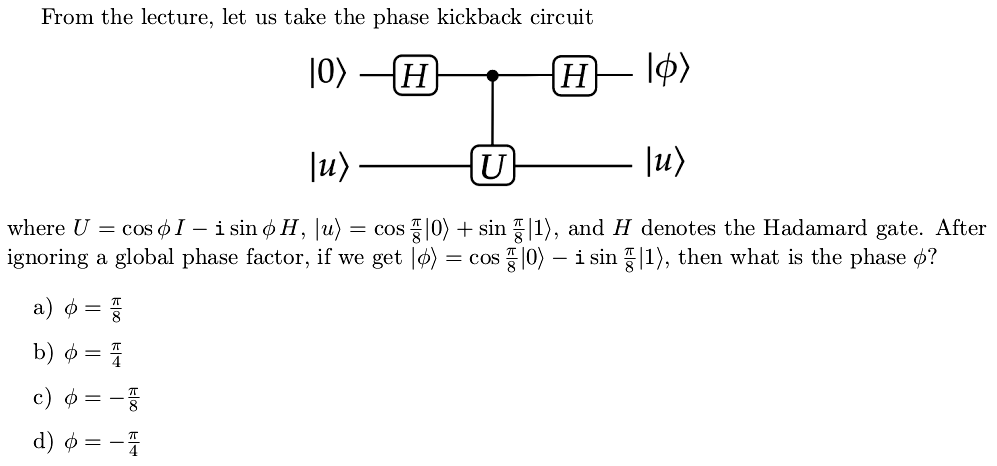

Here solution is 
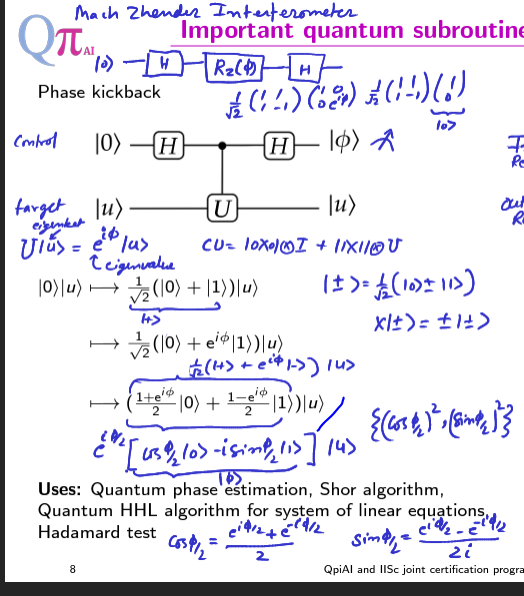

But phase negative cuz of U = -i.sin

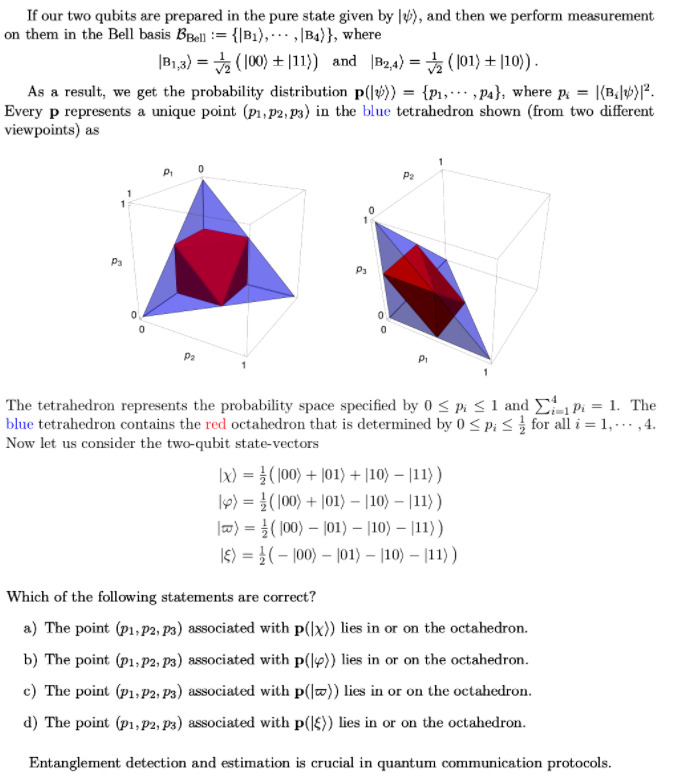

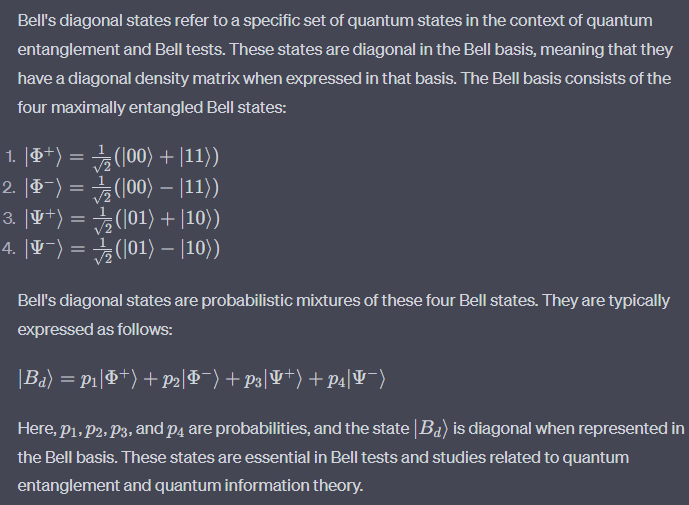

pi = <Bi|X>^2
<00|00> = 1 <11|11> = 1 and so on
while <ij|ji> = 0 (Not orthonormals)

![Alt text](image.png)

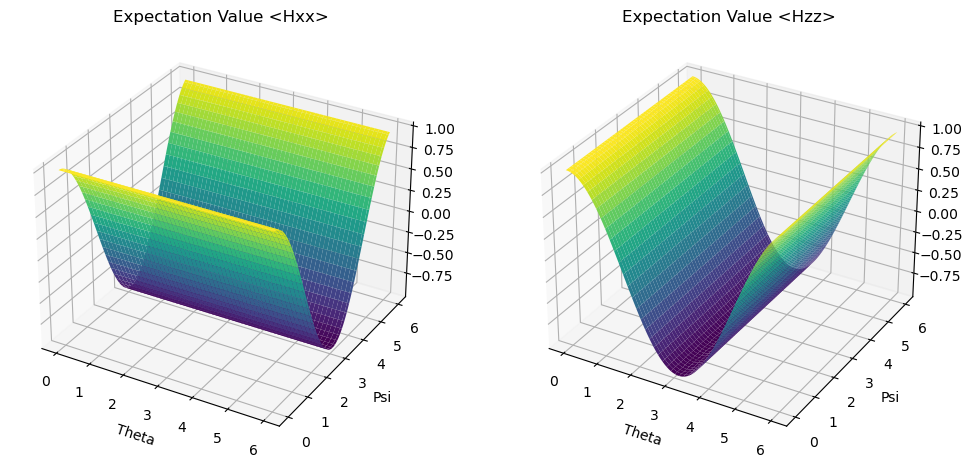

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the qubit state |Φ(θ,ψ)⟩
def qubit_state(theta, psi):
    ctheta = np.cos(theta / 2)
    stheta = np.sin(theta / 2)
    cpsi = np.cos(psi / 2)
    spsi = np.sin(psi / 2)
    
    state = np.array([ctheta * cpsi, ctheta * spsi, stheta * spsi, stheta * cpsi])
    
    return state

# Define the Hamiltonians Hxx and Hzz
Hxx = np.array([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
Hzz = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, 0, -1]])

# Define the range of values for theta and psi
theta_values = np.linspace(0, 6, 100)
psi_values = np.linspace(0, 6, 100)

# Create a mesh grid for theta and psi
Theta, Psi = np.meshgrid(theta_values, psi_values)

# Calculate the expectation values for Hxx and Hzz for each (theta, psi) pair
expectation_xx = np.zeros_like(Theta)
expectation_zz = np.zeros_like(Theta)

for i in range(len(theta_values)):
    for j in range(len(psi_values)):
        state = qubit_state(Theta[i, j], Psi[i, j])
        expectation_xx[i, j] = np.dot(state.conj(), np.dot(Hxx, state))
        expectation_zz[i, j] = np.dot(state.conj(), np.dot(Hzz, state))

# Create 3D surface plots
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot_surface(Theta, Psi, expectation_xx, cmap='viridis')
ax1.set_title('Expectation Value <Hxx>')
ax1.set_xlabel('Theta')
ax1.set_ylabel('Psi')

ax2.plot_surface(Theta, Psi, expectation_zz, cmap='viridis')
ax2.set_title('Expectation Value <Hzz>')
ax2.set_xlabel('Theta')
ax2.set_ylabel('Psi')

plt.show()

In [4]:
import subprocess

mathematica_script = """
(* Define the state *)
ψ = {1, 2, 2, 1}/Sqrt[10];

(* Split the state into two subsystems, e.g., qubit 1 and qubit 2 *)
{a, b} = Partition[ψ, 2];

(* Calculate the Schmidt decomposition using SingularValueDecomposition (SVD) for one of the subsystems *)
{u, s, v} = SingularValueDecomposition[a, FullMatrices -> True];

(* Extract and display the numerical values of the Schmidt coefficients *)
schmidtCoefficients = Sqrt[Diagonal[s]];
schmidtCoefficients

"""

output = subprocess.check_output(['wolframscript','-code', mathematica_script])
print(output.decode('utf-8'))


ToExpression::sntxi: Incomplete expression; more input is needed .

$Failed

